In [73]:
# Importaciones para manejo de matrices y trazado.
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# vamos a mantener nuestras keras backend tensorflow 
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# sobre el CPU
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# Keras importa para el conjunto de datos y construye nuestra red neuronal.
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [74]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

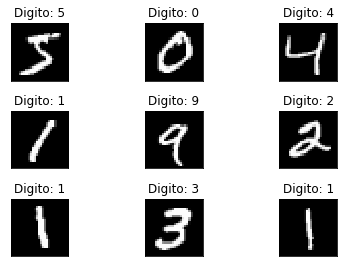

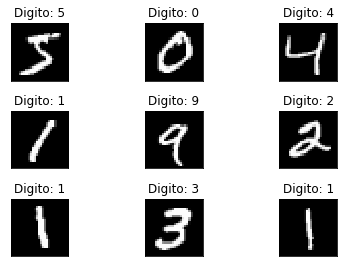

In [75]:
%matplotlib inline
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digito: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Text(0.5, 1.0, 'Digito: 5')

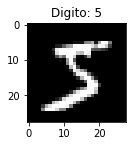

In [76]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digito: {}".format(y_train[0]))




In [77]:
# imprimamos la forma antes de remodelar y normalizar
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# Construyendo el vector de entrada a partir de los 28x28 píxeles.
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizando los datos para ayudar con el entrenamiento.
X_train /= 255
X_test /= 255

# imprimir la forma de entrada final listo para el entrenamiento
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [78]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [79]:
# Codificación de un solo uso de las utilidades relacionadas con el número de keras
n_classes = 10
print("Forma antes de una codificación: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Despues de codificar: ", Y_train.shape)

Forma antes de una codificación:  (60000,)
Despues de codificar:  (60000, 10)


In [80]:
# Construyendo una pila lineal de capas con el modelo secuencial.
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [81]:
# compilando el modelo secuencial
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [82]:
# Entrenando el modelo y salvando métricas en la historia.
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=100,
          verbose=2,
          validation_data=(X_test, Y_test))





Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 8s - loss: 0.2502 - acc: 0.9245 - val_loss: 0.1089 - val_acc: 0.9668
Epoch 2/100
 - 6s - loss: 0.1033 - acc: 0.9681 - val_loss: 0.0782 - val_acc: 0.9761
Epoch 3/100
 - 6s - loss: 0.0730 - acc: 0.9775 - val_loss: 0.0707 - val_acc: 0.9783
Epoch 4/100
 - 6s - loss: 0.0564 - acc: 0.9817 - val_loss: 0.0679 - val_acc: 0.9804
Epoch 5/100
 - 6s - loss: 0.0469 - acc: 0.9851 - val_loss: 0.0692 - val_acc: 0.9791
Epoch 6/100
 - 6s - loss: 0.0390 - acc: 0.9874 - val_loss: 0.0621 - val_acc: 0.9821
Epoch 7/100
 - 6s - loss: 0.0337 - acc: 0.9891 - val_loss: 0.0798 - val_acc: 0.9798
Epoch 8/100
 - 6s - loss: 0.0307 - acc: 0.9899 - val_loss: 0.0579 - val_acc: 0.9834
Epoch 9/100
 - 6s - loss: 0.0280 - acc: 0.9909 - val_loss: 0.0687 - val_acc: 0.9819
Epoch 10/100
 - 6s - loss: 0.0260 - acc: 0.9912 - val_loss: 0.0688 - val_acc: 0.9812
Epoch 11/100
 - 6s - loss: 0.0244 - acc: 0.9918 - val_loss: 0.0656 - val_acc: 0.9830
Epoch 12/100
 - 7s - los

Epoch 97/100
 - 7s - loss: 0.0098 - acc: 0.9977 - val_loss: 0.1127 - val_acc: 0.9863
Epoch 98/100
 - 7s - loss: 0.0067 - acc: 0.9982 - val_loss: 0.1083 - val_acc: 0.9855
Epoch 99/100
 - 7s - loss: 0.0088 - acc: 0.9979 - val_loss: 0.1056 - val_acc: 0.9868
Epoch 100/100
 - 7s - loss: 0.0058 - acc: 0.9986 - val_loss: 0.1159 - val_acc: 0.9856


In [83]:
# guardando el modelo
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Modelo entrenado guardado en %s ' % model_path)

Modelo entrenado guardado en /results/keras_mnist.h5 


In [84]:
mnist_model = load_model(model_path )
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Prueba de perdida", loss_and_metrics[0])
print("Exactitud de prueba", loss_and_metrics[1])

Prueba de perdida 0.11587596298052595
Exactitud de prueba 0.9856



9856  Clasificado correctamente
144  Clasificado incorrectamente


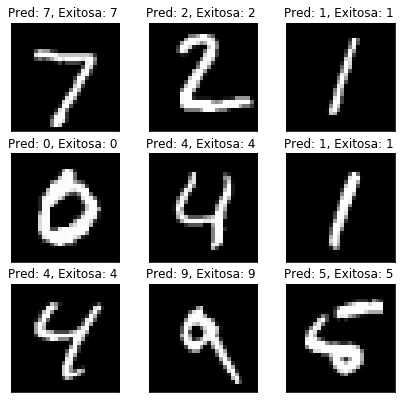

In [85]:
# cargar el modelo y crear predicciones en el conjunto de prueba
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(X_test)

# Ver que predijimos correctamente y que no
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," Clasificado correctamente")
print(len(incorrect_indices)," Clasificado incorrectamente")

# Adapta el tamaño de la figura para acomodar 18 subparcelas.
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# trazar 9 predicciones correctas
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Pred: {}, Exitosa: {} ".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

